In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
import branca.colormap as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [5]:
df = pd.read_parquet("trips_weather_merged.parquet")

In [7]:
df.columns

Index(['tpep_pickup_hour', 'LocationID', 'Total_Trips', 'pickup_hour',
       'pickup_day', 'pickup_month', 'weekday', 'is_weekend', 'rush_hour',
       'temperature_2m', 'precipitation', 'rain', 'snowfall', 'snow_depth',
       'wind_speed_10m'],
      dtype='object')

In [9]:
df_grouped = pd.DataFrame(df.groupby(["tpep_pickup_hour",'temperature_2m', 'precipitation', 'rain', 'snowfall', 'snow_depth',
       'wind_speed_10m'])["Total_Trips"].sum()).reset_index()

In [11]:
df.head()

,tpep_pickup_hour,LocationID,Total_Trips,pickup_hour,pickup_day,pickup_month,weekday,is_weekend,rush_hour,temperature_2m,precipitation,rain,snowfall,snow_depth,wind_speed_10m
0,2022-01-01,4,11.0,0,1,1,5,1,0,8.3005,0.0,0.0,0.0,0.0,3.545589
1,2022-01-01,12,2.0,0,1,1,5,1,0,8.3005,0.0,0.0,0.0,0.0,3.545589
2,2022-01-01,13,12.0,0,1,1,5,1,0,8.3005,0.0,0.0,0.0,0.0,3.545589
3,2022-01-01,24,11.0,0,1,1,5,1,0,8.3005,0.0,0.0,0.0,0.0,3.545589
4,2022-01-01,41,12.0,0,1,1,5,1,0,8.3005,0.0,0.0,0.0,0.0,3.545589


In [13]:
df.LocationID.unique().shape

(69,)

In [180]:
sns.set_palette("Set2")

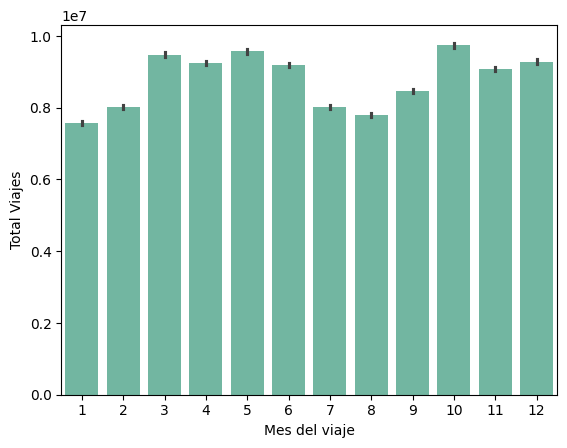

In [229]:
fig, ax = plt.subplots()
sns.barplot(data=df[df["tpep_pickup_hour"]<"2025-01-01"], x=df["tpep_pickup_hour"].dt.month, y="Total_Trips", estimator=sum, ax=ax)
ax.set(xlabel='Mes del viaje', ylabel='Total Viajes')
fig.savefig("viaje_mes.png") 

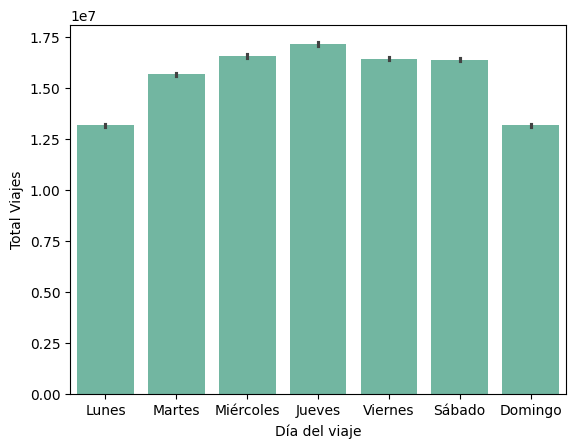

In [223]:
# Crear figura y ejes
fig, ax = plt.subplots()
sns.barplot(
    data=df,
    x=df["tpep_pickup_hour"].dt.weekday,
    y="Total_Trips",
    estimator=sum,
    ax=ax
)

dias_semana = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
ax.set_xticks(range(7))  # Asegurarse de que hay un tick por cada día
ax.set_xticklabels(dias_semana)

# Etiquetas de los ejes
ax.set(xlabel='Día del viaje', ylabel='Total Viajes')

# Guardar imagen
fig.savefig("viaje_dia.png")

In [176]:
sns.color_palette("Set2")[2]

(0.5529411764705883, 0.6274509803921569, 0.796078431372549)

In [ ]:
sns.barplot(data=df, x=df["tpep_pickup_hour"].dt.day, y="Total_Trips")

In [ ]:
sns.barplot(data=df, x=df["tpep_pickup_hour"].dt.year, y="Total_Trips")

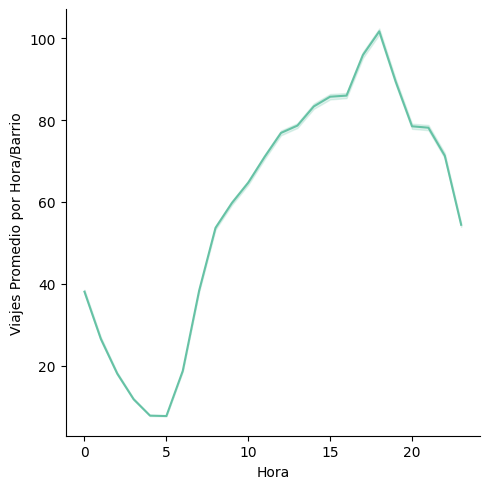

In [259]:
g = sns.relplot(data=df, x=df["tpep_pickup_hour"].dt.hour, y="Total_Trips", kind="line")
g.set_axis_labels("Hora", "Viajes Promedio por Hora/Barrio")
g.figure.savefig("viajes_hora_dia.png", dpi=300, bbox_inches='tight')

In [ ]:
sns.displot(data=df, x="Total_Trips", kind="kde", hue=df["tpep_pickup_hour"].dt.weekday)

In [ ]:
df_grouped.head()

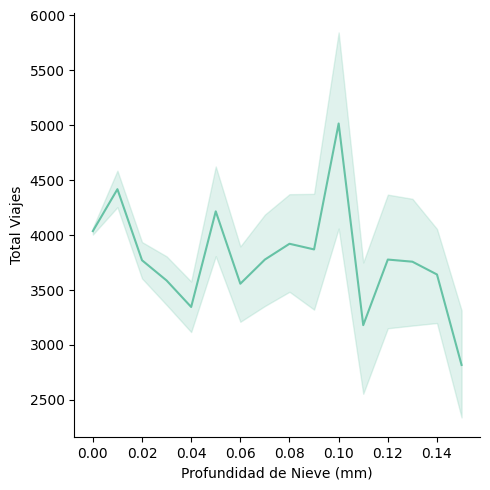

In [241]:
g = sns.relplot(data=df_grouped, x="snow_depth", y="Total_Trips", kind="line")
g.set_axis_labels("Profundidad de Nieve (mm)", "Total Viajes")
g.figure.savefig("viajes_nieve.png", dpi=300, bbox_inches='tight')

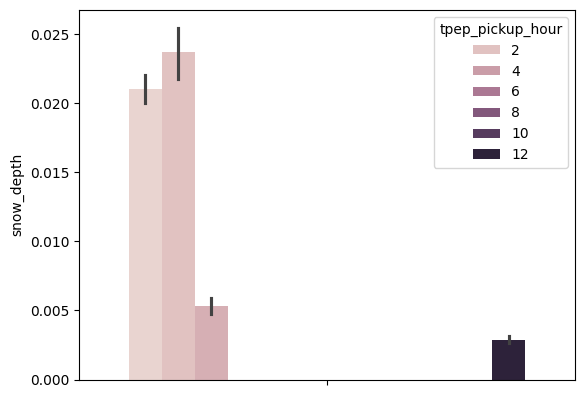

In [276]:
g = sns.barplot(data=df_grouped, y="snow_depth", hue=df_grouped["tpep_pickup_hour"].dt.month)
g.figure.savefig("graf_nieve.png", dpi=300, bbox_inches='tight')

In [ ]:
df_grouped.columns

In [232]:
temp_variables = ['temperature_2m', 'precipitation', 'rain',
       'snowfall', 'snow_depth', 'wind_speed_10m']

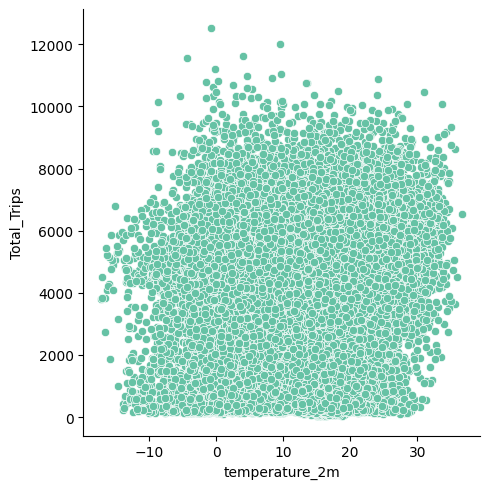

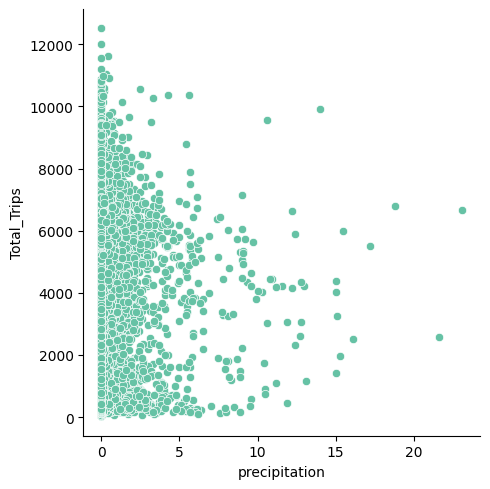

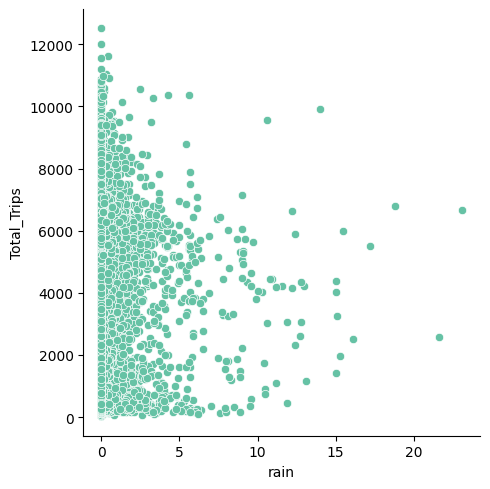

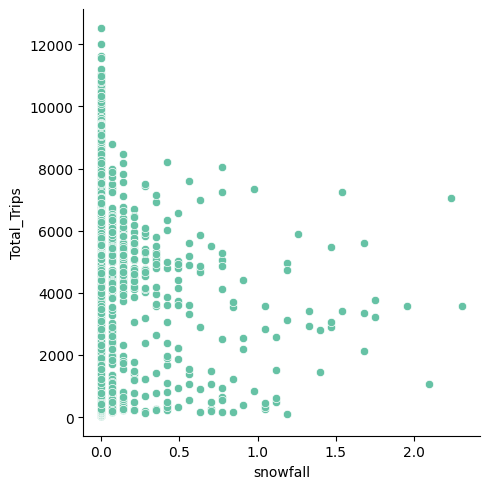

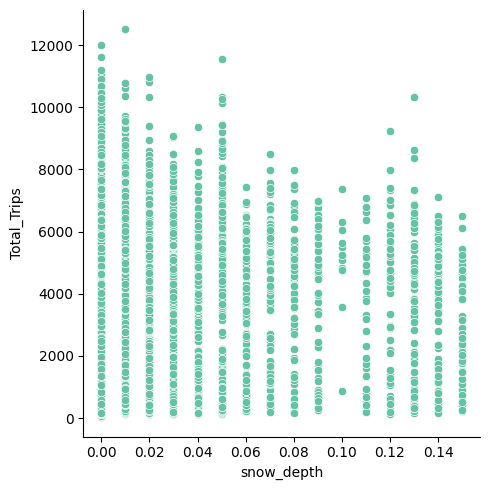

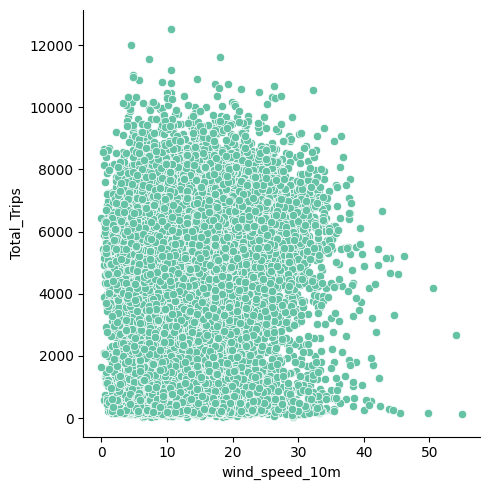

In [262]:
for i in temp_variables:
    sns.relplot(data=df_grouped, x=i, y="Total_Trips")
    plt.show()

In [ ]:
df_grouped_location = df.groupby("LocationID")["Total_Trips"].agg(["sum","mean"]).reset_index().sort_values('sum',ascending=False)

In [ ]:
df_grouped_location

In [ ]:
sns.barplot(data=df, x="LocationID", y="Total_Trips", order=df_grouped_location["LocationID"])

In [ ]:
df_grouped.head()

In [ ]:
sns.relplot(data=df_grouped[df_grouped["tpep_pickup_hour"]>"2025-01-13"], x="tpep_pickup_hour", y="Total_Trips", kind="line", height=5, aspect=5)

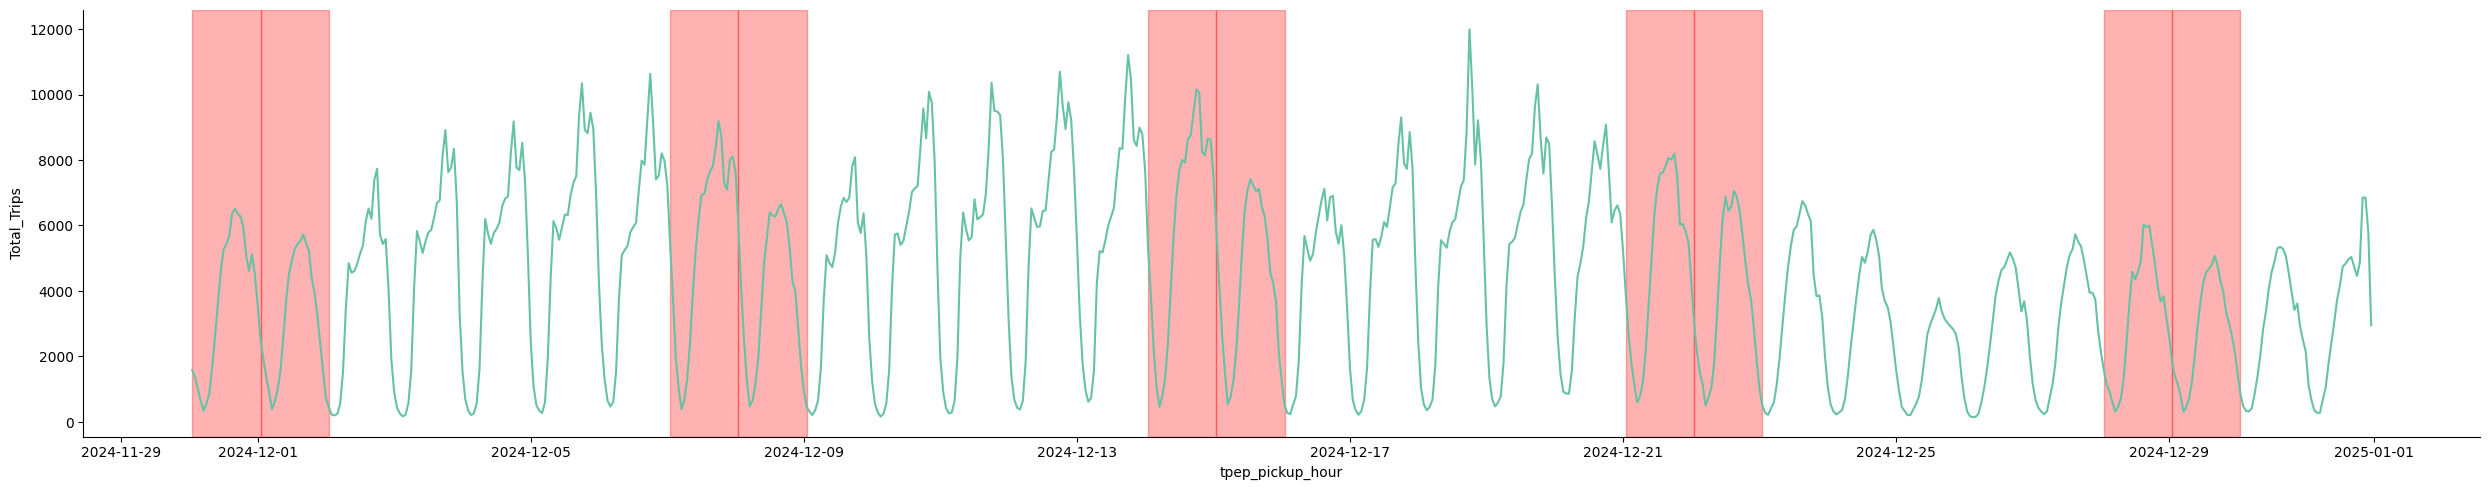

In [225]:
# Filter the data
filtered_df = df_grouped[(df_grouped["tpep_pickup_hour"] > "2024-11-30") & (df_grouped["tpep_pickup_hour"] < "2025-01-01")]

# Create the plot
g = sns.relplot(
    data=filtered_df,
    x="tpep_pickup_hour",
    y="Total_Trips",
    kind="line",
    height=5,
    aspect=5
)

# Get the axis to plot on
ax = g.ax

# Loop through the time range and highlight weekends
for date in pd.date_range(start=filtered_df["tpep_pickup_hour"].min(), end=filtered_df["tpep_pickup_hour"].max()):
    if date.weekday() >= 5:  # 5 = Saturday, 6 = Sunday
        ax.axvspan(date, date + pd.Timedelta(days=1), color='red', alpha=0.3)

plt.show()


In [227]:
g.figure.savefig("viajes_diciembre.png", dpi=300, bbox_inches='tight')

In [141]:
gdf = gpd.read_file("taxi_zones.shp")
# Set the CRS manually to EPSG:2263 (since it came without one)
# Asignar CRS original manualmente (ej: NYC)
gdf = gdf.set_crs(epsg=2263)

# Transformar a lat/lon
gdf = gdf.to_crs(epsg=4326)

In [149]:
taxi_zone_lookup= pd.read_csv("data/taxi_zones/taxi_zone_lookup.csv")
taxi_zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [151]:
gdf = gdf.join(taxi_zone_lookup).drop(columns="service_zone")

manhattan_gdf = gdf[gdf["Borough"] == "Manhattan"]

manhattan_gdf = manhattan_gdf.merge(df_grouped_location, how="left", on="LocationID")

In [255]:
df_grouped_location[["Zone", "mean_x", "median_x", "max_x"]].head()

,Zone,mean_x,median_x,max_x
0,Upper East Side South,211.762067,216.0,830.0
1,Midtown Center,200.427125,184.0,891.0
2,Upper East Side North,189.896814,181.0,768.0
3,Midtown East,154.574285,159.0,651.0
4,Penn Station/Madison Sq West,150.805928,166.0,637.0


In [ ]:
sns.relplot(data=df, x="pickup_hour", y="Total_Trips", hue="LocationID", kind="line")

In [119]:
df_grouped_location = df.groupby("LocationID")["Total_Trips"].agg(["sum","max","mean","median"]).reset_index().sort_values('sum',ascending=False)

In [247]:
df_grouped.describe()

,tpep_pickup_hour,temperature_2m,precipitation,rain,snowfall,snow_depth,wind_speed_10m,Total_Trips
count,26541,26541.000000,26541.000000,26541.000000,26541.000000,26541.000000,26541.000000,26541.000000
mean,2023-07-11 06:04:41.586978304,11.990052,0.156034,0.149018,0.004924,0.004876,12.803187,4018.431898
min,2022-01-01 00:00:00,-17.149500,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
25%,2022-10-04 12:00:00,4.200500,0.000000,0.000000,0.000000,0.000000,7.754637,1690.000000
50%,2023-07-08 00:00:00,11.950501,0.000000,0.000000,0.000000,0.000000,11.833546,4522.000000
75%,2024-04-09 12:00:00,20.000500,0.000000,0.000000,0.000000,0.000000,16.735160,5794.000000
max,2025-01-31 23:00:00,36.700497,23.100000,23.100000,2.310000,0.150000,54.976370,12509.000000
std,NaN,9.765251,0.801408,0.795570,0.063450,0.018148,6.593405,2370.895745


In [243]:
df.describe()

,tpep_pickup_hour,LocationID,Total_Trips,pickup_hour,pickup_day,pickup_month,weekday,is_weekend,rush_hour,temperature_2m,precipitation,rain,snowfall,snow_depth,wind_speed_10m
count,1866485,1.866485e+06,1.866485e+06,1.866485e+06,1.866485e+06,1.866485e+06,1.866485e+06,1.866485e+06,1.866485e+06,1.866485e+06,1.866485e+06,1.866485e+06,1.866485e+06,1.831684e+06,1.866485e+06
mean,2023-07-18 11:37:07.724518400,1.474368e+02,5.817226e+01,1.149998e+01,1.573747e+01,6.370643e+00,2.999804e+00,2.856498e-01,2.976274e-01,1.222004e+01,1.566709e-01,1.497874e-01,4.831333e-03,4.876392e-03,1.274225e+01
min,2022-01-01 00:00:00,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.714950e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2022-10-09 17:00:00,1.000000e+02,3.000000e+00,6.000000e+00,8.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.350500e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.704336e+00
50%,2023-07-18 11:00:00,1.440000e+02,2.100000e+01,1.200000e+01,1.600000e+01,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.225050e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.175388e+01
75%,2024-04-25 06:00:00,2.240000e+02,8.600000e+01,1.700000e+01,2.300000e+01,9.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,2.040050e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.662249e+01
max,2025-01-31 23:00:00,2.630000e+02,1.239000e+03,2.300000e+01,3.100000e+01,1.200000e+01,6.000000e+00,1.000000e+00,1.000000e+00,3.670050e+01,2.310000e+01,2.310000e+01,2.310000e+00,1.500000e-01,5.497637e+01
std,NaN,7.200255e+01,8.198638e+01,6.922391e+00,8.807432e+00,3.519069e+00,1.999835e+00,4.517235e-01,4.572149e-01,9.835851e+00,8.026056e-01,7.968933e-01,6.285210e-02,1.814787e-02,6.575311e+00


In [67]:
df_grouped_location["mean"].describe()

count     69.000000
mean      58.161717
std       56.458908
min        0.000000
25%        6.545387
50%       41.915151
75%       97.016853
max      211.762067
Name: mean, dtype: float64

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

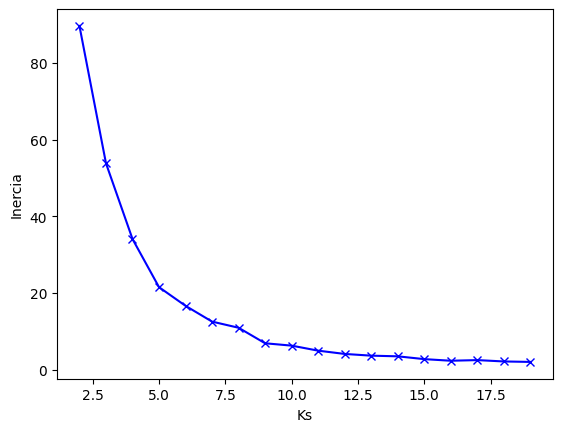

In [69]:
scaler = StandardScaler()

df_grouped_location_escalado = scaler.fit_transform(df_grouped_location.iloc[:, 1:])
inercias = [] 

for k in range(2,20): 
    kmeans = KMeans(k)
    kmeans.fit(df_grouped_location_escalado)     
    inercias.append(kmeans.inertia_) 

plt.plot(range(2,20), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

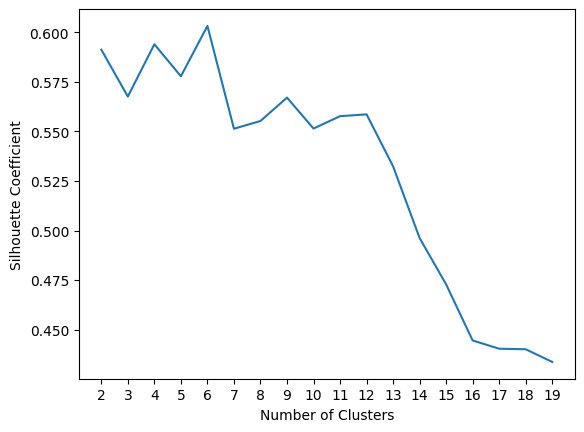

In [71]:
from sklearn.metrics import silhouette_score
# silhouette va des de -1 a 1
silhouette_coefficients = []

#Tiene en cuenta 2 factores
# - Como de cerca estan los puntos de un grupo
# - Como de lejos estan de los otros grupos

# Empezamos con 2
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_grouped_location_escalado)
    score = silhouette_score(df_grouped_location_escalado, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [117]:
kmeans = KMeans(n_clusters=3, init="random", random_state=42)

pipeline = Pipeline(steps=[("Escalador",scaler),("kmeans",kmeans)])

In [121]:
pipeline.fit(df_grouped_location.iloc[:, 1:])

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('Escalador', StandardScaler()),
                ('kmeans',
                 KMeans(init='random', n_clusters=3, random_state=42))])

In [123]:
df_grouped_location["cluster"]=pipeline.predict(df_grouped_location.iloc[:, 1:])

In [125]:
df_grouped_location.to_csv("df_grouped_location.csv")

In [128]:
df_centroides  = pd.DataFrame(data = kmeans.cluster_centers_)
df_centroides

,0,1,2,3
0,1.497635,1.309611,1.497498,1.483235
1,-0.844787,-0.786810,-0.844840,-0.827901
2,0.195791,0.250548,0.195988,0.179448


In [132]:
pd.DataFrame(scaler.inverse_transform(df_centroides)).rename(columns={0:"Total_Trips", 1:"Max_Trips", 2:"Mean_Trips", 3:"Median_Trips"})

,Total_Trips,Max_Trips,Mean_Trips,Median_Trips
0,3.844926e+06,655.875000,142.093920,142.687500
1,2.923717e+05,76.424242,10.809873,9.939394
2,1.870529e+06,363.150000,69.146497,67.800000


In [61]:
pd.DataFrame(scaler.inverse_transform(df_centroides))

,0,1,2,3,4,5
0,171.5625,3.844926e+06,655.875000,142.093920,142.687500,-2.220446e-16
1,125.0000,2.923717e+05,76.424242,10.809873,9.939394,1.000000e+00
2,165.1500,1.870529e+06,363.150000,69.146497,67.800000,2.000000e+00


In [134]:
import pydeck as pdk
import json
import matplotlib.cm as cm
import matplotlib.colors as colors

In [159]:
# Convert GeoDataFrame to GeoJSON
geojson = json.loads(manhattan_gdf.to_json())

# Normalize 'sum' for color and height
min_val = manhattan_gdf["mean"].min()
max_val = manhattan_gdf["mean"].max()
norm = colors.Normalize(vmin=min_val, vmax=max_val)
colormap = cm.get_cmap("YlOrRd")

# Add 'fill_color' and 'elevation' properties to each feature
for feature in geojson["features"]:
    val = feature["properties"]["mean"]
    rgba = colormap(norm(val), bytes=True)
    feature["properties"]["fill_color"] = [int(rgba[0]), int(rgba[1]), int(rgba[2]), 180]  # semi-transparent
    feature["properties"]["elevation"] = val  # height based on 'sum'

# Create a 3D extruded PolygonLayer
polygon_layer = pdk.Layer(
    "GeoJsonLayer",
    geojson,
    extruded=True,
    get_elevation="properties.elevation",
    get_fill_color="properties.fill_color",
    get_line_color=[0, 0, 0, 150],
    pickable=True,
    auto_highlight=True,
)

# View settings
view_state = pdk.ViewState(
    latitude=manhattan_gdf.geometry.centroid.y.mean(),
    longitude=manhattan_gdf.geometry.centroid.x.mean(),
    zoom=11,
    pitch=45,  # tilt to view in 3D
    bearing=0,
)

# Render deck
r = pdk.Deck(
    layers=[polygon_layer],
    initial_view_state=view_state,
    tooltip={
        "html": "<b>Zone:</b> {properties.Zone}<br>"
                "<b>LocationID:</b> {properties.LocationID}<br>"
                "<b>Sum:</b> {properties.sum}<br>"
                "<b>Mean:</b> {properties.mean}"
    },
)

# Show or export
r.to_html("nyc_taxi_map.html", notebook_display=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_10828\558452505.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("YlOrRd")
C:\Users\Acer\AppData\Local\Temp\ipykernel_10828\558452505.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  latitude=manhattan_gdf.geometry.centroid.y.mean(),
C:\Users\Acer\AppData\Local\Temp\ipykernel_10828\558452505.py:32: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  longitude=manhattan_gdf.geometry.centroid.x.mean(),


In [161]:
manhattan_gdf.head()

,geometry,LocationID,Borough,Zone,sum,max,mean,median,cluster
0,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4,Manhattan,Alphabet City,175867.0,153.0,6.502274,4.0,1
1,"POLYGON ((-74.01566 40.70483, -74.0154 40.7048...",12,Manhattan,Battery Park,52124.0,27.0,1.927306,0.0,1
2,"POLYGON ((-74.01244 40.71906, -74.01282 40.717...",13,Manhattan,Battery Park City,731470.0,139.0,27.043404,25.0,1
3,"POLYGON ((-73.95954 40.79872, -73.96004 40.798...",24,Manhattan,Bloomingdale,337990.0,63.0,12.496857,12.0,1
4,"POLYGON ((-73.94774 40.8096, -73.94506 40.8084...",41,Manhattan,Central Harlem,338700.0,139.0,12.523109,11.0,1


In [163]:
df_test = df.merge(df_grouped_location, on="LocationID", ).drop(columns=["sum","max","mean","median"])

In [171]:
df_grouped_location

,LocationID,sum_x,max_x,mean_x,median_x,cluster_x,geometry,Borough,Zone,max_y,median_y,cluster_y
0,237,5729858.0,830.0,211.762067,216.0,0,"POLYGON ((-73.96613 40.76218, -73.96658 40.761...",Manhattan,Upper East Side South,830.0,216.0,0
1,161,5423558.0,891.0,200.427125,184.0,0,"POLYGON ((-73.97534 40.7553, -73.97581 40.7546...",Manhattan,Midtown Center,891.0,184.0,0
2,236,5138228.0,768.0,189.896814,181.0,0,"POLYGON ((-73.95779 40.7736, -73.95826 40.7729...",Manhattan,Upper East Side North,768.0,181.0,0
3,162,4182471.0,651.0,154.574285,159.0,0,"POLYGON ((-73.97122 40.75519, -73.97168 40.754...",Manhattan,Midtown East,651.0,159.0,0
4,186,4080356.0,637.0,150.805928,166.0,0,"POLYGON ((-73.99097 40.74542, -73.99142 40.744...",Manhattan,Penn Station/Madison Sq West,637.0,166.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64,128,941.0,4.0,0.034794,0.0,1,"MULTIPOLYGON (((-73.9236 40.8789, -73.92362 40...",Manhattan,Inwood Hill Park,4.0,0.0,1
65,120,753.0,3.0,0.027842,0.0,1,"POLYGON ((-73.92295 40.85885, -73.92283 40.856...",Manhattan,Highbridge Park,3.0,0.0,1
66,105,28.0,1.0,0.001035,0.0,1,"POLYGON ((-74.01675 40.69334, -74.0154 40.6930...",Manhattan,Governor's Island/Ellis Island/Liberty Island,1.0,0.0,1
67,103,0.0,0.0,0.000000,0.0,1,"POLYGON ((-74.04389 40.69018, -74.04351 40.689...",Manhattan,Governor's Island/Ellis Island/Liberty Island,0.0,0.0,1


In [167]:
df_grouped_location = df_grouped_location.merge(manhattan_gdf, on="LocationID").drop(columns=["sum_y","mean_y"])

In [169]:
import geopandas as gpd
import folium

# Assuming df_grouped_location is your DataFrame with a 'geometry' column
# and 'cluster' column

# Assuming your geometry column is named 'geometry'
df_grouped_location_gdf = gpd.GeoDataFrame(df_grouped_location, geometry=df_grouped_location["geometry"])

# **SET THE CRS HERE. Replace 'EPSG:your_crs_code' with the correct CRS**
df_grouped_location_gdf = df_grouped_location_gdf.set_crs('EPSG:4326')

# Define colors for each cluster label
cluster_colors = {
    1: "#ffffb2",    # light yellow
    2: "#fecc5c",  # orange
    0: "#e31a1c"      # red
}

# Create base map centered on Manhattan
m = folium.Map(
    location=[df_grouped_location_gdf.geometry.centroid.y.mean(),
              df_grouped_location_gdf.geometry.centroid.x.mean()],
    zoom_start=12
)

# Add GeoJson layer with cluster-based colors
folium.GeoJson(
    df_grouped_location_gdf,
    name="NYC Taxi Zones",
    style_function=lambda feature: {
        "fillColor": cluster_colors[feature["properties"]["cluster"]],
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.5
    },
    tooltip=folium.GeoJsonTooltip(fields=["LocationID", "Zone","mean_x", "cluster"]),
).add_to(m)

# Add custom legend for clusters
legend_html = """
<div style="position: fixed;
          bottom: 30px; left: 30px; width: 170px; height: 130px;
          border:2px solid grey; z-index:9999; font-size:14px;
          background-color:white; padding: 10px;">
  <b>Taxi Demand Clusters</b><br>
  <i style="background:#ffffb2; width:12px; height:12px; float:left; margin-right:5px;"></i>Low<br>
  <i style="background:#fecc5c; width:12px; height:12px; float:left; margin-right:5px;"></i>Medium<br>
  <i style="background:#e31a1c; width:12px; height:12px; float:left; margin-right:5px;"></i>High<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Add layer control
folium.LayerControl().add_to(m)

m

# m.save("nyc_taxi_zones_clusters.html")

C:\Users\Acer\AppData\Local\Temp\ipykernel_10828\293274348.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location=[df_grouped_location_gdf.geometry.centroid.y.mean(),
C:\Users\Acer\AppData\Local\Temp\ipykernel_10828\293274348.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_grouped_location_gdf.geometry.centroid.x.mean()],


KeyError: 'cluster'

In [264]:
df_grouped

,tpep_pickup_hour,temperature_2m,precipitation,rain,snowfall,snow_depth,wind_speed_10m,Total_Trips
0,2022-01-01 00:00:00,8.3005,0.0,0.0,0.0,0.0,3.545589,3912.0
1,2022-01-01 01:00:00,9.0005,0.0,0.0,0.0,0.0,6.569383,4661.0
2,2022-01-01 02:00:00,8.2505,0.0,0.0,0.0,0.0,6.120000,3656.0
3,2022-01-01 03:00:00,7.9005,0.0,0.0,0.0,0.0,4.693825,2531.0
4,2022-01-01 04:00:00,7.7505,0.0,0.0,0.0,0.0,3.396233,1539.0


In [278]:
from Funciones import *

In [291]:
df_grouped["is_holiday"] = is_holiday(df_grouped)

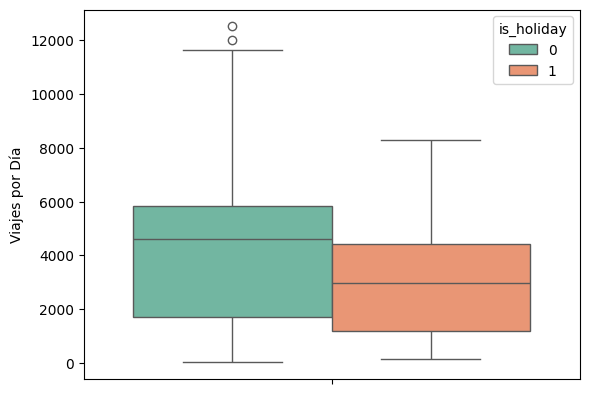

In [305]:
fig, ax = plt.subplots()
sns.boxplot(data=df_grouped, y="Total_Trips", hue="is_holiday", ax=ax)
ax.set(ylabel='Viajes por Día')
fig.savefig("viaje_festivos.png")

In [287]:
df.head()

0    1
1    1
2    1
3    1
4    1
Name: is_holiday, dtype: int64